In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats


In [2]:
mknn_df = pd.read_csv('../results/m_knn_merged.csv')

cos_df = pd.read_csv('../results/cosine_merged.csv')


In [3]:
model_dims = {'conch': 768,
              'uni': 1024,
              'pathdino': 384,
              'hibou_b': 768,
              'hibou_l': 1024,
              'phikon': 768,
              'phikon2': 1024,
              'prov_gigapath': 1536,
              'virchow': 2560,
              'virchow2': 3584,
              'kaiko_b': 512,
              'kaiko_l': 512}
model_sizes = {'conch': 395232769,
               'uni': 303350784,
               'pathdino': 9000000,
               'hibou_b': 85741056,
               'hibou_l': 303659264,
               'phikon': 85798656,
               'phikon2': 303351808,
               'prov_gigapath': 1134953984,
               'virchow': 631229184,
               'virchow2': 631239424,
               'kaiko_b': 85807872,
               'kaiko_l': 304370688}

rot_augmentation = {'conch': False,
                     'uni': False,
                     'pathdino': True,
                     'hibou_b': True,
                     'hibou_l': True,
                     'phikon': False,
                     'phikon2': False,
                     'prov_gigapath': False,
                     'virchow': False,
                     'virchow2': False,
                     'kaiko_b': False,
                     'kaiko_l': False}


In [4]:
mknn_df = mknn_df.sort_values(by='mean mNN Similarity', ascending=False)
mknn_df['emb. size'] = mknn_df['Model'].map(model_dims)
mknn_df['model size (M)'] = (mknn_df['Model'].map(model_sizes).astype(float)/1000000).round(2)
mknn_df['rot aug'] = mknn_df['Model'].map(rot_augmentation)

In [5]:
cos_df = cos_df.sort_values(by='cosine distance', ascending=False)
cos_df['emb. size'] = cos_df['Model'].map(model_dims)
cos_df['model size (M)'] = (cos_df['Model'].map(model_sizes).astype(float)/1000000).round(2)
cos_df['rot aug'] = cos_df['Model'].map(rot_augmentation)

NormaltestResult(statistic=9.184365227312579, pvalue=0.010130722771554544)
NormaltestResult(statistic=23.18286442612796, pvalue=9.244958213260283e-06)
-8.875368582998318 9.290165043258173e-17


<Axes: xlabel='rot aug', ylabel='cosine distance'>

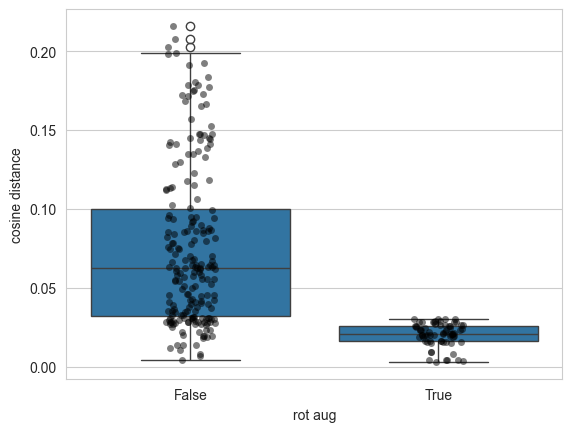

In [6]:
cos_with_rotation = cos_df[cos_df['rot aug'] == True]['cosine distance'].to_numpy()
cos_without_rotation = cos_df[cos_df['rot aug'] == False]['cosine distance'].to_numpy()

print(stats.normaltest(cos_with_rotation))
print(stats.normaltest(cos_without_rotation))

u_stat, p_value_u = stats.ttest_ind(cos_with_rotation, cos_without_rotation)

print(u_stat, p_value_u)

# sns.boxplot(data=cos_df, y="cosine distance", x='rot aug')

ax = sns.boxplot(data=cos_df, y='cosine distance', x='rot aug')
sns.stripplot(data=cos_df,  y='cosine distance', x='rot aug', c='black', alpha=0.5)



NormaltestResult(statistic=1.9463666886303528, pvalue=0.3778782049858497)
NormaltestResult(statistic=21.892098432541616, pvalue=1.7627520431736977e-05)
6.908162704915931 3.429795928924826e-11


<Axes: xlabel='rot aug', ylabel='mean mNN Similarity'>

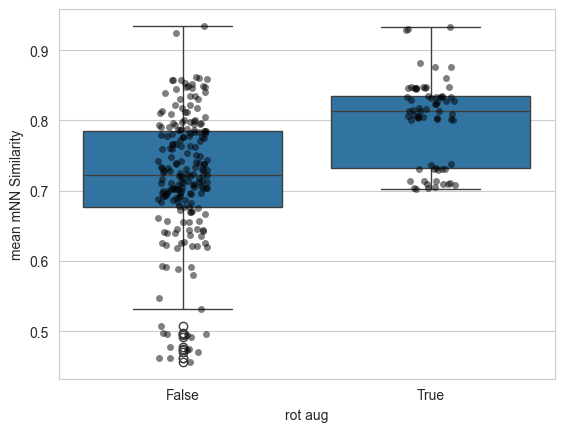

In [7]:
mknn_with_rotation = mknn_df[mknn_df['rot aug'] == True]['mean mNN Similarity'].to_numpy()
mknn_without_rotation = mknn_df[mknn_df['rot aug'] == False]['mean mNN Similarity'].to_numpy()

print(stats.normaltest(mknn_with_rotation))
print(stats.normaltest(mknn_without_rotation))

u_stat, p_value_u = stats.ttest_ind(mknn_with_rotation, mknn_without_rotation)
print(u_stat, p_value_u)
sns.boxplot(data=mknn_df, y="mean mNN Similarity", x='rot aug', )
sns.stripplot(data=mknn_df, y="mean mNN Similarity", x='rot aug', c='black', alpha=0.5)